In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

In [ ]:
raw_data=pd.read_csv('Churn_data.csv')
raw_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
raw_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
raw_data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
raw_data.shape

(7043, 21)

In [ ]:
raw_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
raw_data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
raw_data['Churn'].value_counts()/len(raw_data['Churn'])

,count
Churn,
No,0.73463
Yes,0.26537


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


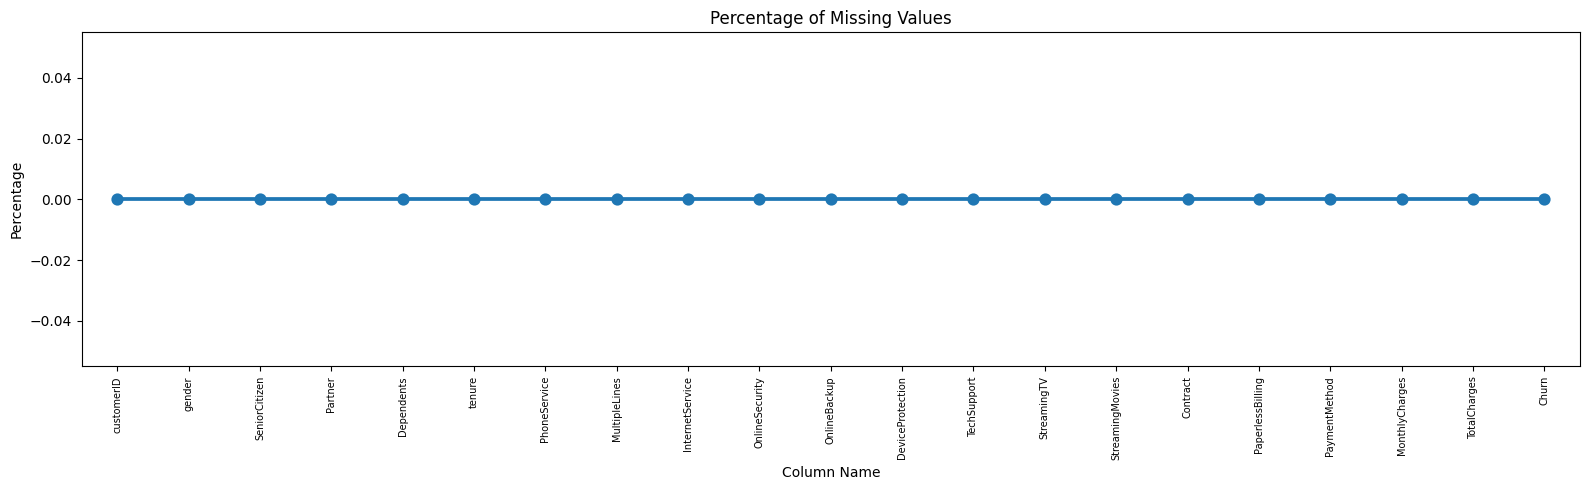

In [ ]:
missing = pd.DataFrame({
    'column': raw_data.columns,
    'percentage_missing': (raw_data.isnull().sum() * 100 / raw_data.shape[0])
})

plt.figure(figsize=(16, 5))
sns.pointplot(data=missing, x='column', y='percentage_missing')
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.xlabel("Column Name")
plt.tight_layout()
plt.show()

In [ ]:
copy_data=raw_data.copy()

In [ ]:
copy_data.TotalCharges=pd.to_numeric(copy_data.TotalCharges,errors='coerce')

In [ ]:
copy_data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
copy_data.dropna(subset=['TotalCharges'], inplace=True)

In [ ]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
copy_data['Tenure_dist'] = pd.cut(raw_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [ ]:
copy_data['Tenure_dist'].value_counts()

,count
Tenure_dist,
1 - 12,2175
61 - 72,1407
13 - 24,1024
25 - 36,832
49 - 60,832
37 - 48,762


In [ ]:
copy_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)

In [ ]:
copy_data['Churn'] = np.where(copy_data.Churn=='Yes',1,0)

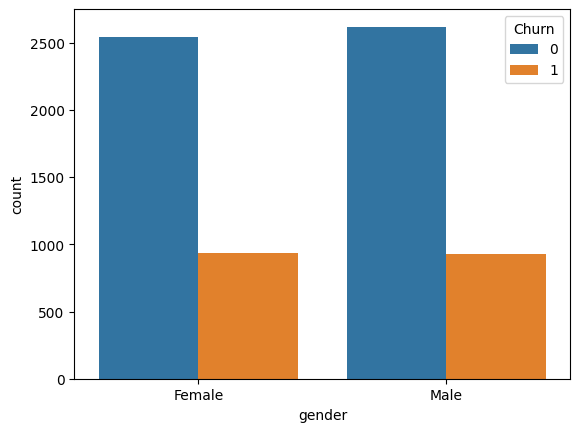

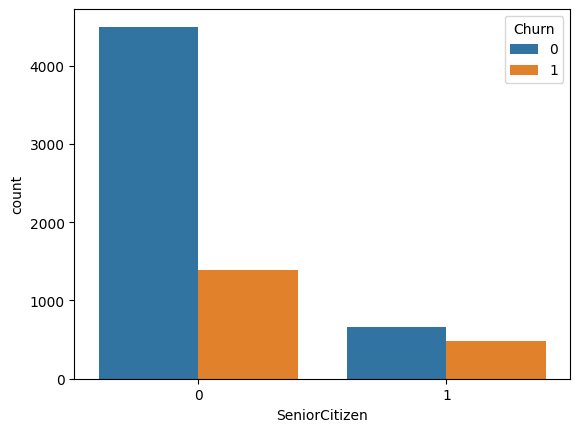

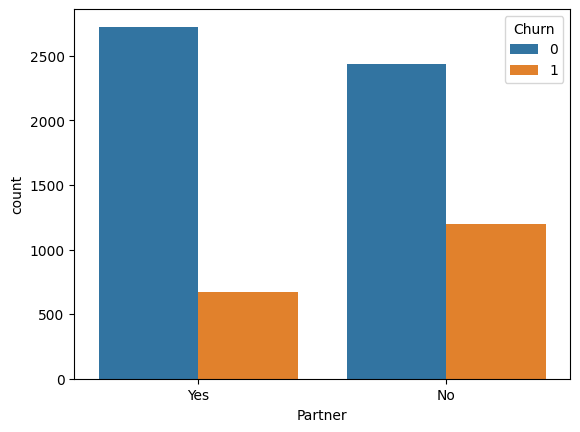

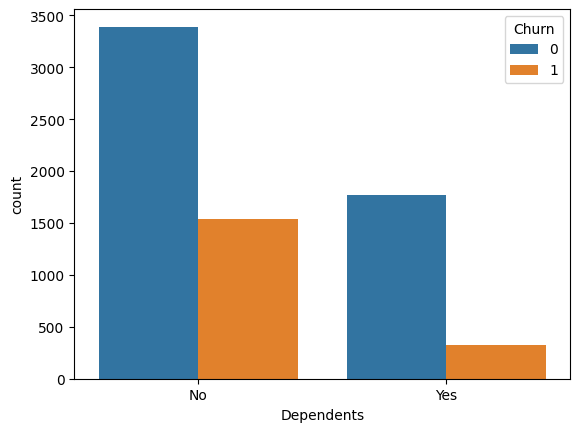

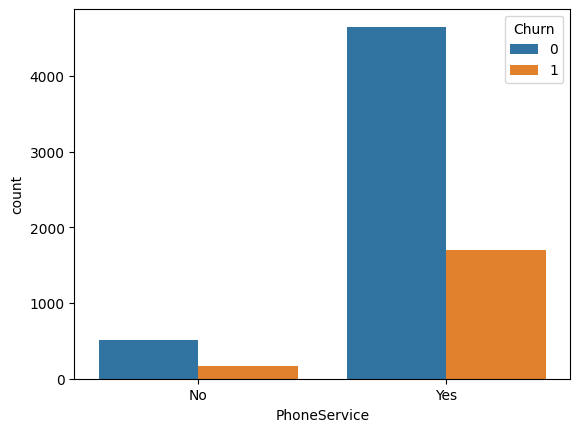

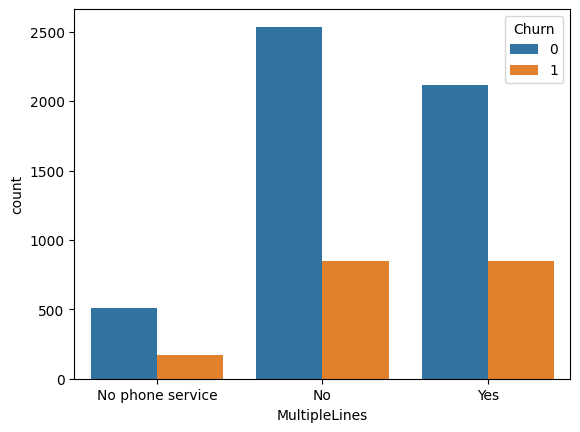

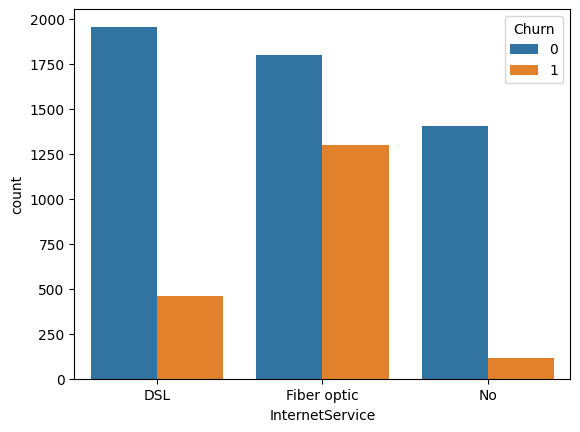

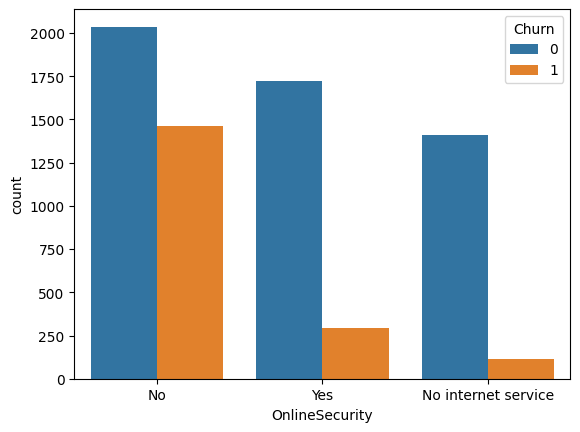

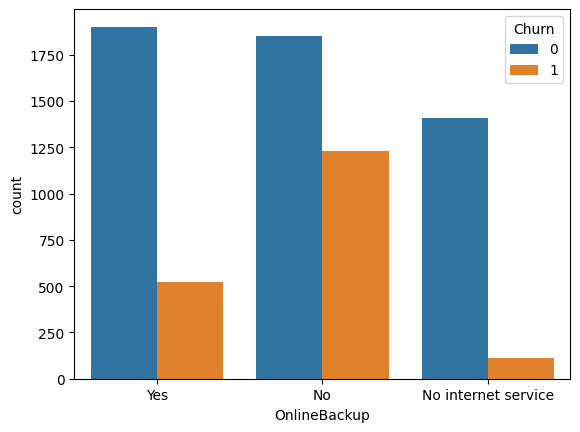

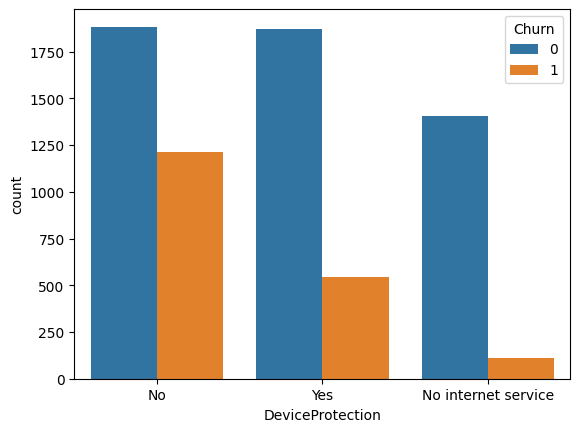

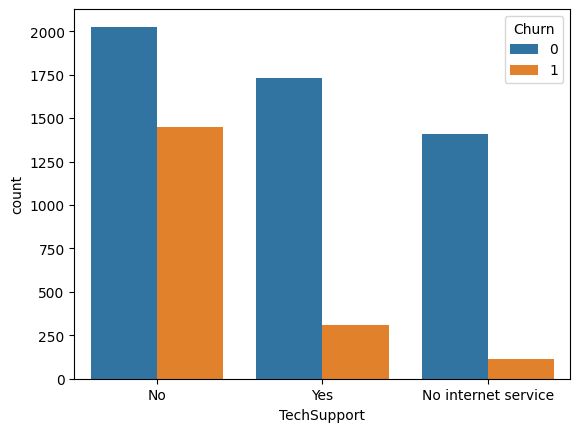

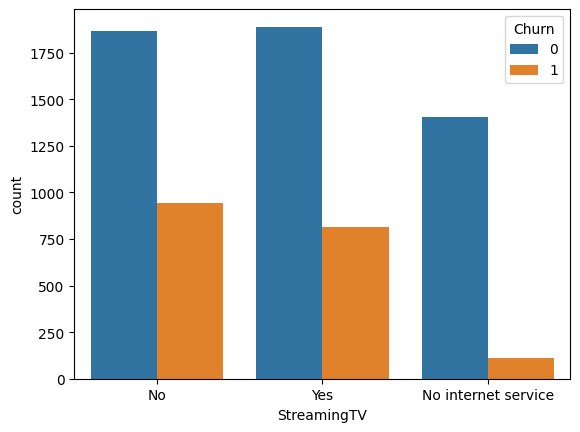

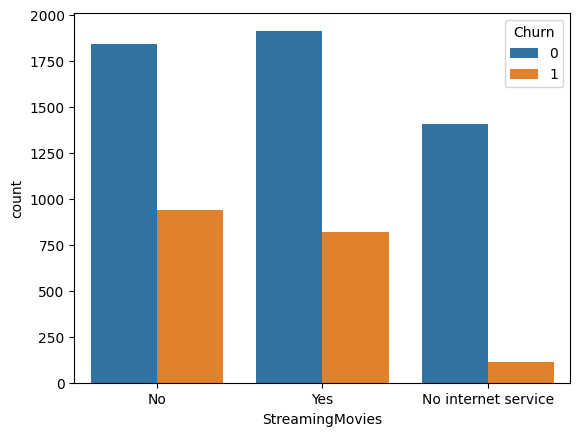

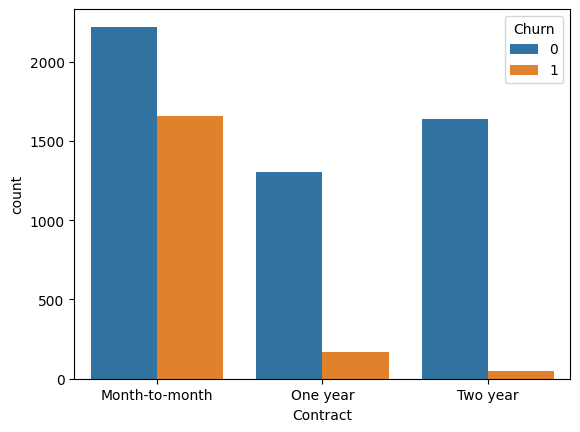

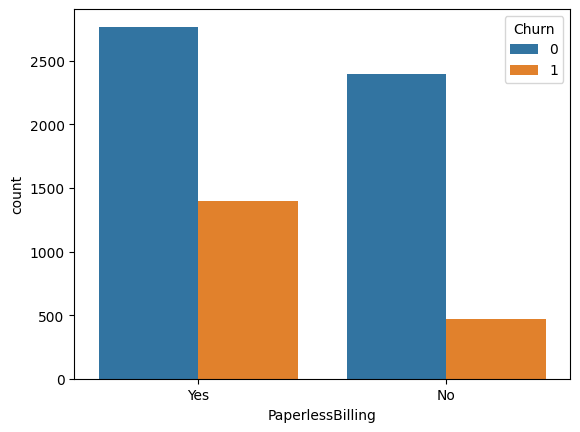

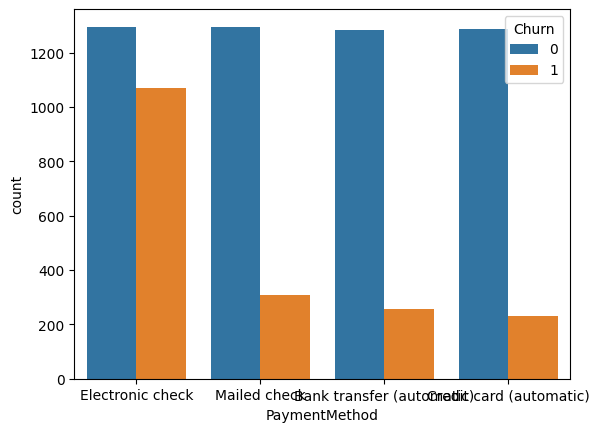

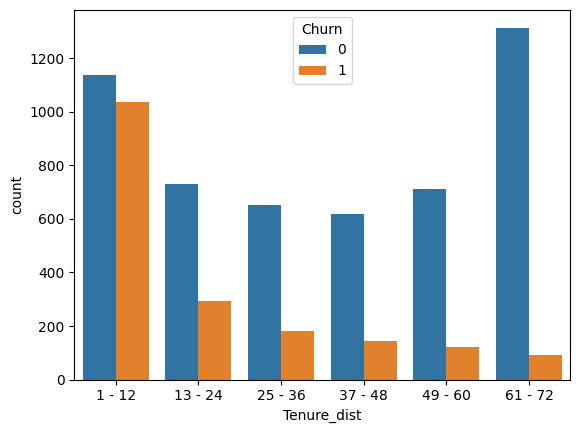

In [ ]:
for i, current in enumerate(copy_data.drop(columns=['Churn','MonthlyCharges','TotalCharges'])):
    plt.figure(i)
    sns.countplot(data=copy_data, x=current, hue='Churn')

In [ ]:
copy_data_dummies = pd.get_dummies(copy_data)

In [ ]:
copy_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_dist_13 - 24,Tenure_dist_25 - 36,Tenure_dist_37 - 48,Tenure_dist_49 - 60,Tenure_dist_61 - 72
0,0,29.85,29.85,0,False,True,False,False,True,False,...,False,True,False,True,False,False,False,False,False,False
1,0,56.95,1889.50,0,True,False,False,True,False,False,...,False,False,False,False,True,False,True,False,False,False
2,0,53.85,108.15,1,True,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,False
3,0,42.30,1840.75,0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False


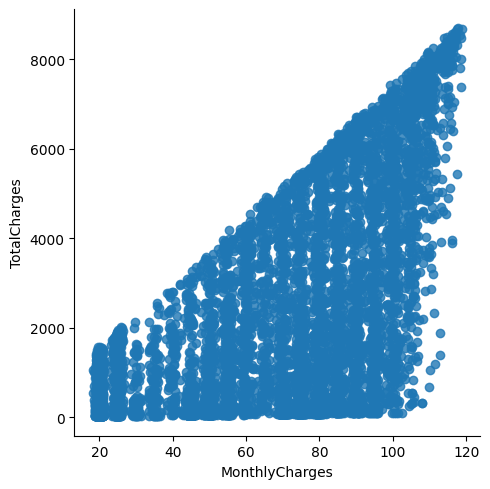

In [ ]:
sns.lmplot(data=copy_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

<ipython-input-98-776348803>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(copy_data_dummies.MonthlyCharges[(copy_data_dummies["Churn"] == 0) ],
<ipython-input-98-776348803>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(copy_data_dummies.MonthlyCharges[(copy_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

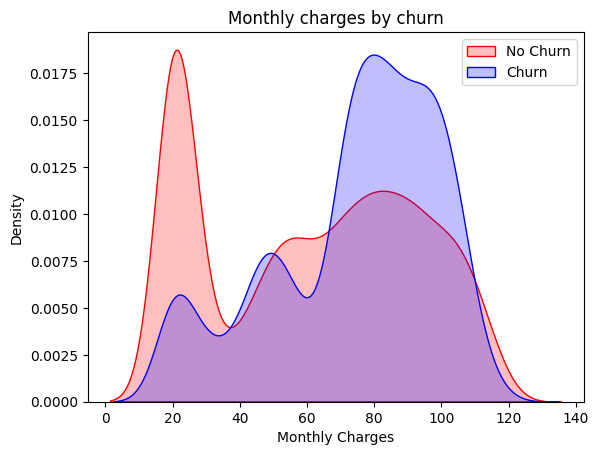

In [ ]:
Mth = sns.kdeplot(copy_data_dummies.MonthlyCharges[(copy_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(copy_data_dummies.MonthlyCharges[(copy_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

<ipython-input-99-2338727681>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(copy_data_dummies.TotalCharges[(copy_data_dummies["Churn"] == 0) ],
<ipython-input-99-2338727681>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(copy_data_dummies.TotalCharges[(copy_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

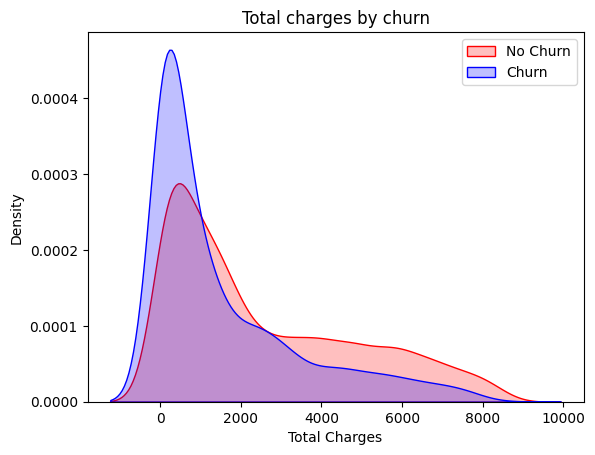

In [ ]:
Tot = sns.kdeplot(copy_data_dummies.TotalCharges[(copy_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(copy_data_dummies.TotalCharges[(copy_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

<Axes: >

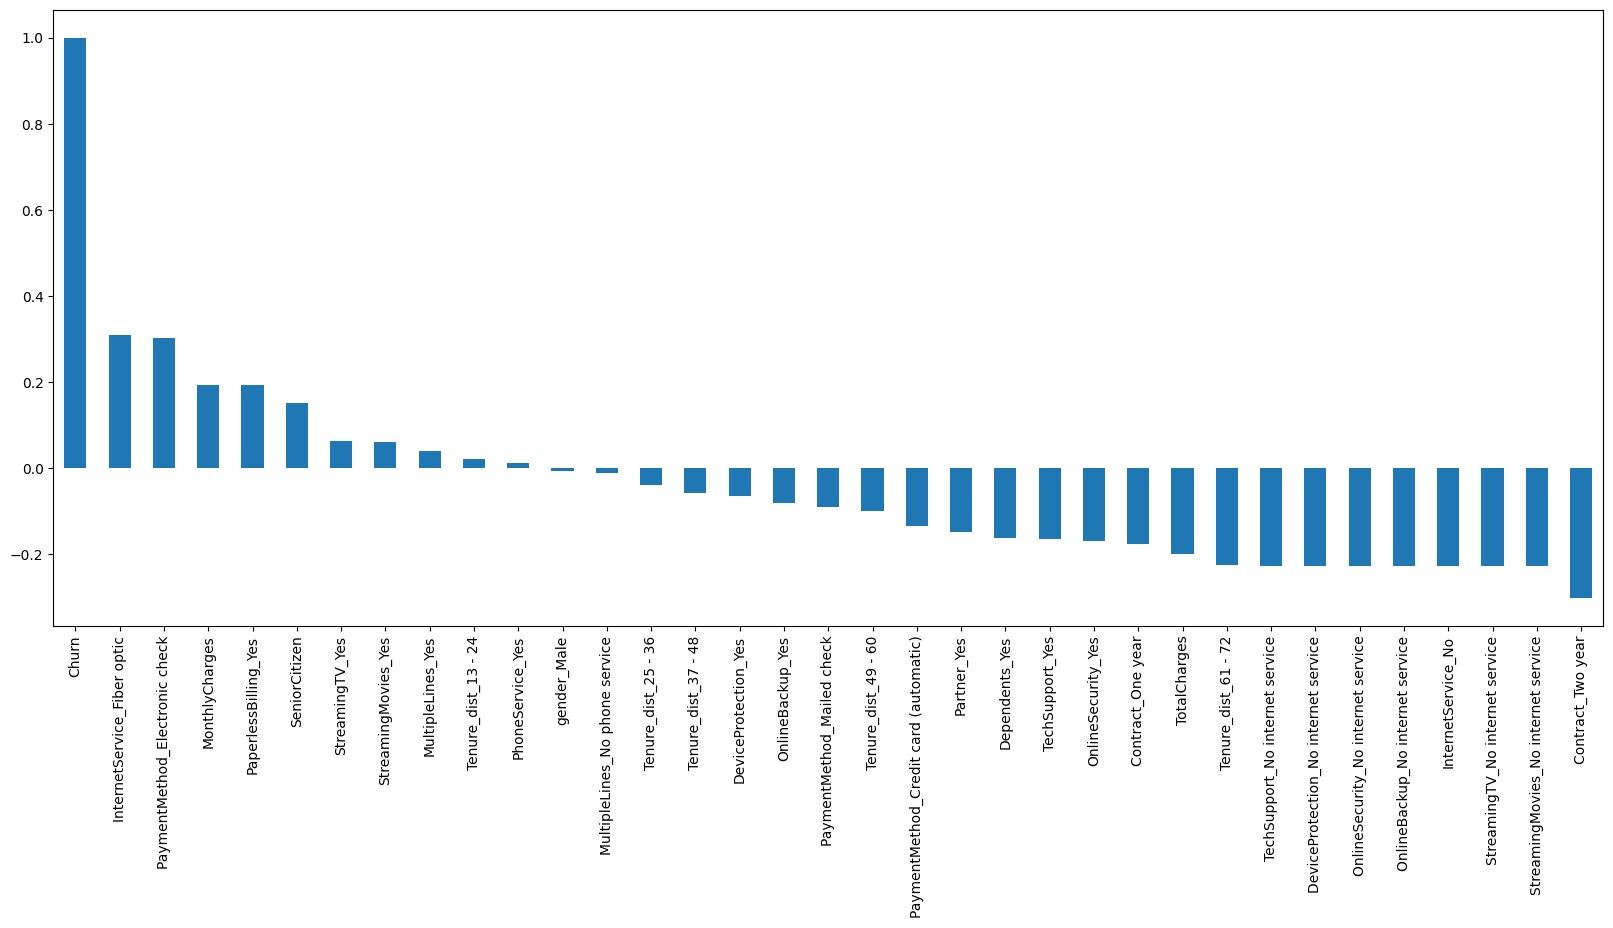

In [ ]:
plt.figure(figsize=(20,8))
copy_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

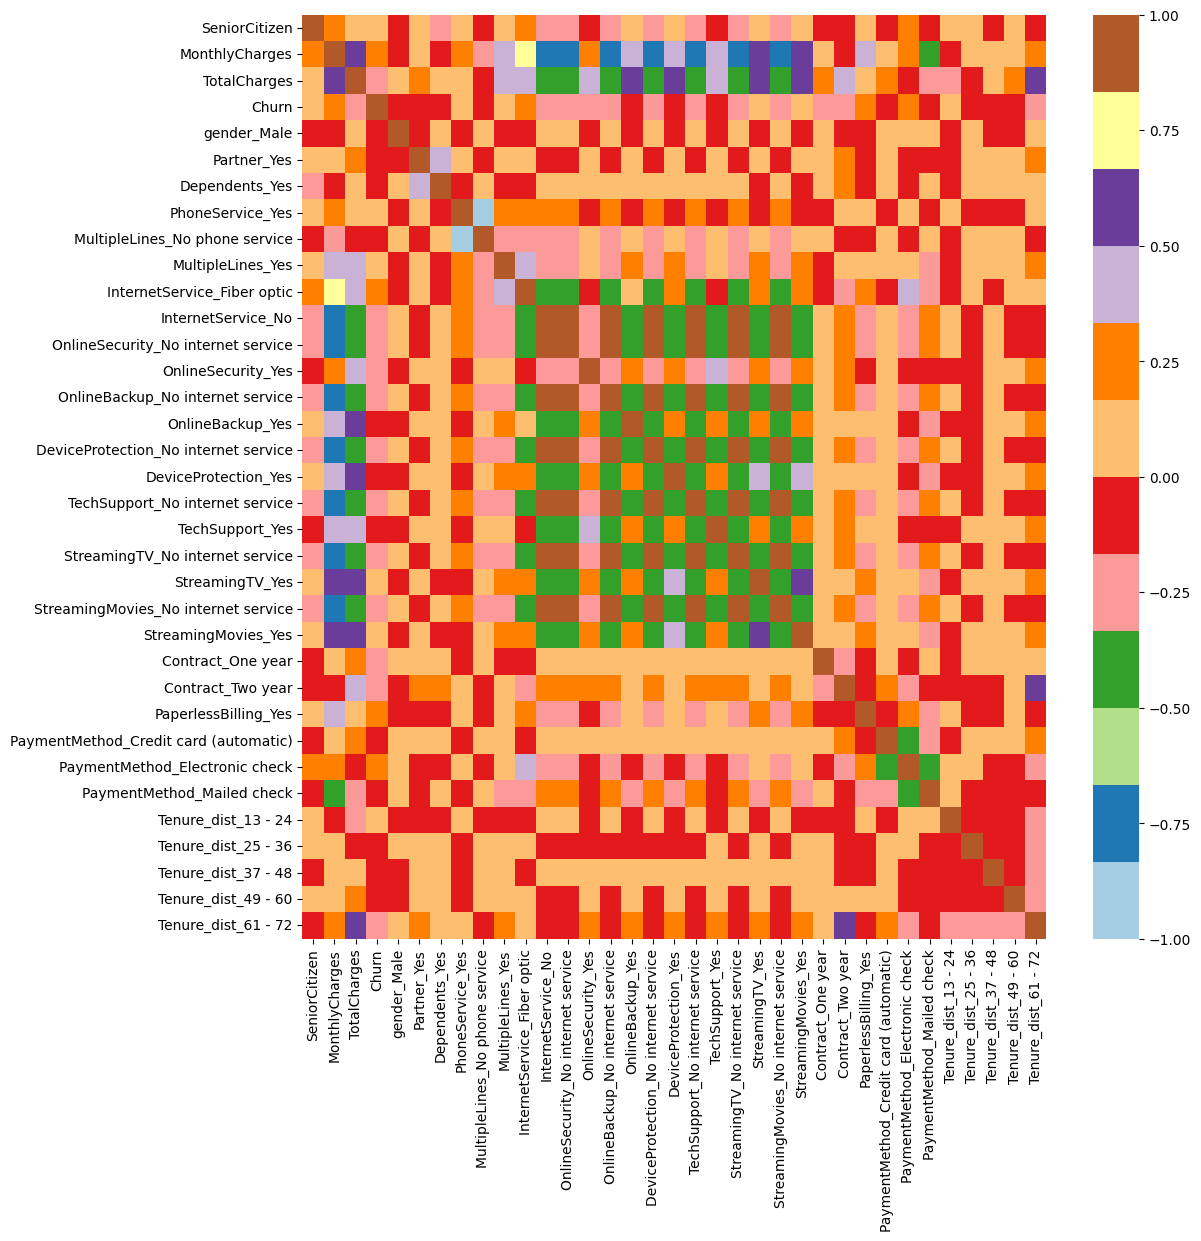

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(copy_data_dummies.corr(), cmap="Paired")

In [ ]:
copy_data_dummies.to_csv('pro_data.csv')